In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os # accessing directory structure
import seaborn as sns


In [13]:
nRowsRead = 50000

df_filmes = pd.read_csv('/home/batou/FilmTV Dataset - ENG.csv', delimiter=',', nrows = nRowsRead)
df_filmes.dataframeName = 'FilmTV Dataset - ENG.csv'
nRow, nCol = df_filmes.shape
print(f'There are {nRow} rows and {nCol} columns')
df_filmes.head()


There are 46907 rows and 10 columns


,filmtv_ID,film_title,year,genre,duration,country,director,actors,avg_vote,votes
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,28
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",7.0,3
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,10
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin",7.1,14
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,12


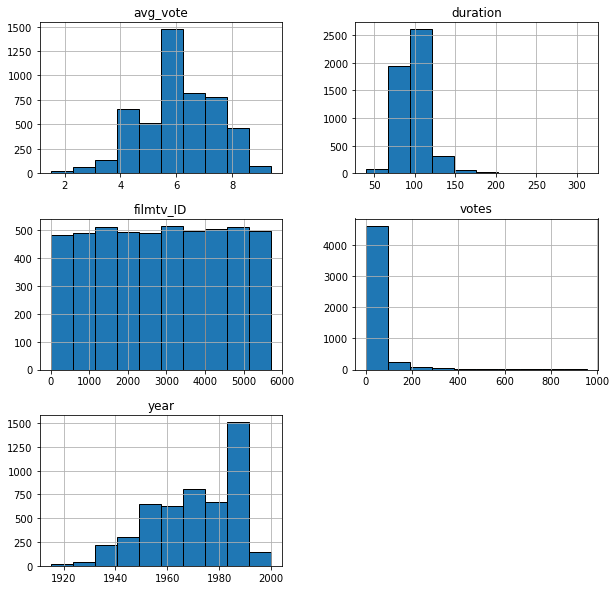

In [3]:
df_filmes.hist(edgecolor='black', figsize=(10, 10), grid=True);

/root/miniconda3/envs/labredes/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


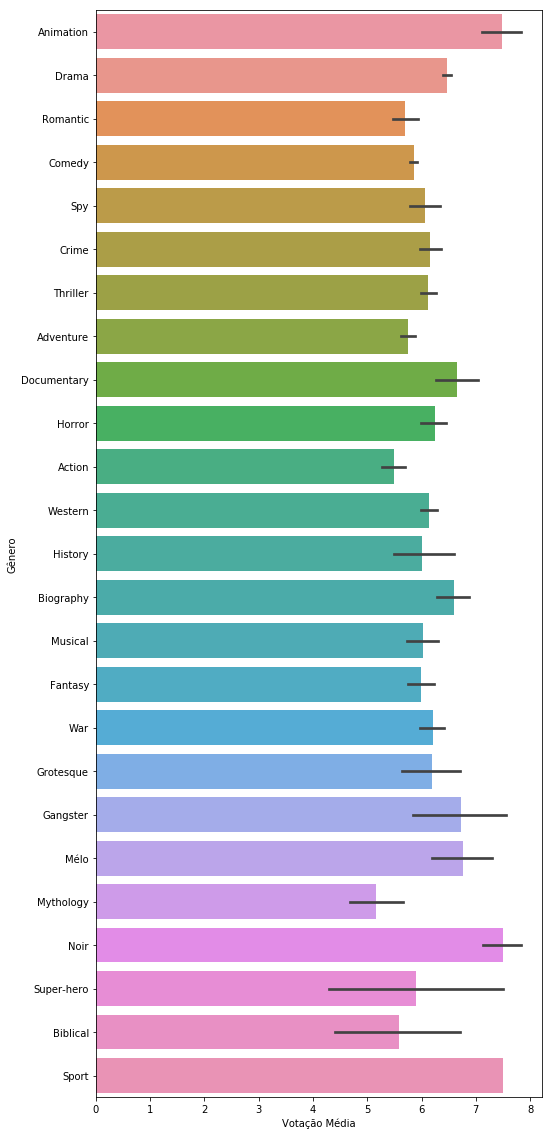

In [4]:
plt.figure(figsize=(8, 20))

sns.barplot(
    x=df_filmes['avg_vote'], 
    y=df_filmes['genre']
)

plt.xlabel('Votação Média')
plt.ylabel('Gênero')
plt.show()

In [5]:
# Obtém o total de filmes para cada nota
s_filmes = df_filmes.groupby('genre').count()['filmtv_ID']
print('\nTotal de filmes: ', df_filmes.shape[0])


Total de filmes:  5000


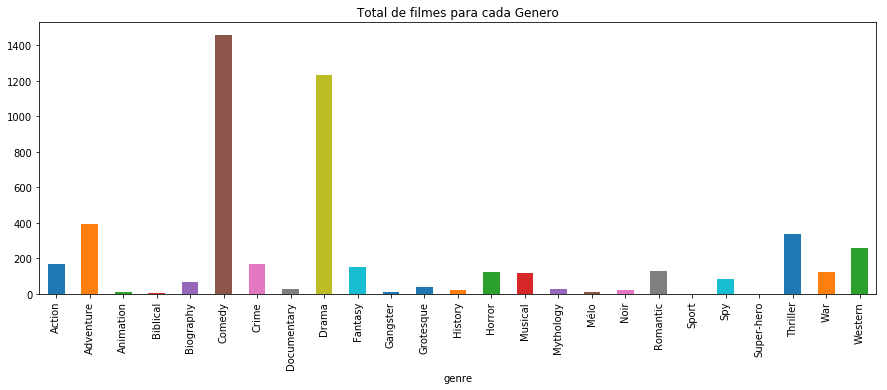

In [6]:
s_filmes.plot(kind='bar', title='Total de filmes para cada Genero', figsize=(15, 5))

In [7]:
pais_filmes = df_filmes.groupby('country').size()
print(pais_filmes)

country
Argentina                                       3
Australia                                      27
Australia, United States                        2
Austria                                        19
Austria, Germany                                1
Belgium                                         5
Belgium, France, Poland                         1
Botswana, United States                         1
Brazil                                          1
Canada                                         22
Canada, France                                  1
Canada, Hungary                                 1
Canada, Romania                                 1
Canada, United States                           2
Czechoslovakia                                  7
Czechoslovakia, Germany, Austria                1
Denmark                                         3
Denmark, Switzerland                            1
Finland                                         1
Finland, Germany                          

In [15]:
ator = 'Adam Sandler'
diretor = 'Alfred Hitchcock'
npgeneros = np.array([])
npnotas = np.array([])
npdiretores = np.array([])
npdiretoresGeneros = np.array([])
for index, row in df_filmes.iterrows():
    posicaoDeBusca = str(row['actors']).find(ator)
    if posicaoDeBusca >= 0:
        npgeneros = np.append(npgeneros, row['genre'])
        npnotas = np.append(npnotas, row['avg_vote'])
        npdiretores = np.append(npdiretores, str(row['director']).split(','))
    posicaoDeBusca = str(row['director']).find(diretor)
    if posicaoDeBusca >= 0:
        npdiretoresGeneros = np.append(npdiretoresGeneros, row['genre'])
        
generosDiretor, qtdeGenerosDiretor = np.unique(npdiretoresGeneros, return_counts=True)       
generosEncontrados, qtdeGeneros = np.unique(npgeneros, return_counts=True)
diretoresEncontrados, qtdeDiretores = np.unique(npdiretores, return_counts=True)

Total de Filmes: 36
Nota média dos Filmes: 5.252777777777778
Gênero / Quantidade de Filmes: 
Action: 1
Comedy: 33
Drama: 1
Fantasy: 1


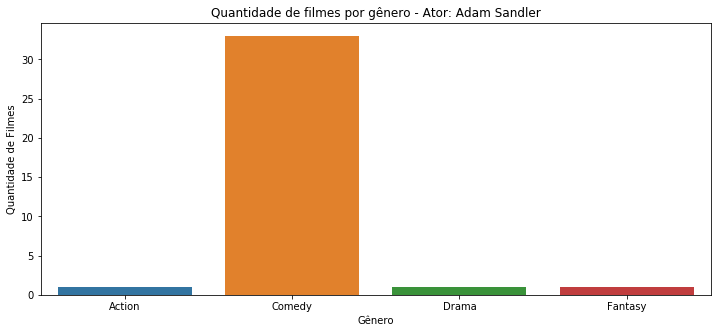

In [16]:
print("Total de Filmes: " + str(len(npnotas)))
print("Nota média dos Filmes: " + str(npnotas.mean()))
print("Gênero / Quantidade de Filmes: ")

for l in range(len(generosEncontrados)):
    print(generosEncontrados[l] + ': '  + str(qtdeGeneros[l]))

plt.figure(figsize=(12, 5))
sns.barplot(
    x=generosEncontrados, 
    y=qtdeGeneros
)
plt.title('Quantidade de filmes por gênero - Ator: ' + ator)
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Filmes')
plt.show()

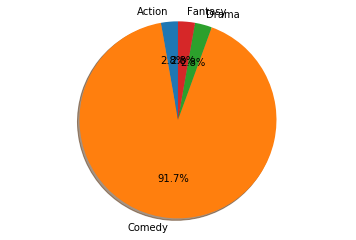

In [17]:
labels = generosEncontrados
sizes = qtdeGeneros
listofzeros = [0] * len(generosEncontrados)
explode = tuple(listofzeros)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

Quantidade de filmes por Diretor - Ator: Adam Sandler
 John Morris: 1
Adam Shankman: 1
Chris Columbus: 1
Chris Rock: 1
Dennis Dugan: 8
Ernest Dickerson: 1
Frank Coraci: 5
James L. Brooks: 1
Jason Reitman: 1
Judd Apatow: 1
Michael Lehmann: 1
Mike Binder: 1
Noah Baumbach: 1
Paul Thomas Anderson: 1
Peter Segal: 3
Robert Smigel: 1
Sean Anders: 1
Steven Brill: 4
Tamra Davis: 1
Thomas McCarthy: 1
Valerie Breiman: 1


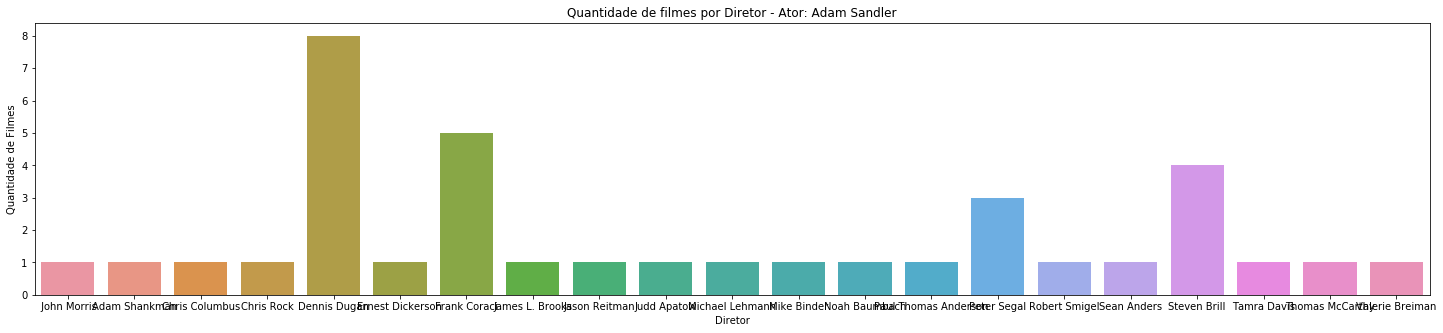

In [18]:
print('Quantidade de filmes por Diretor - Ator: ' + ator)
for l in range(len(diretoresEncontrados)):
    print(diretoresEncontrados[l] + ': '  + str(qtdeDiretores[l]))

plt.figure(figsize=(25, 5))
sns.barplot(
    x=diretoresEncontrados, 
    y=qtdeDiretores
)
plt.title('Quantidade de filmes por Diretor - Ator: ' + ator)
plt.xlabel('Diretor')
plt.ylabel('Quantidade de Filmes')
plt.show()

Quantidade de filmes por gênero - Diretor: Alfred Hitchcock
Comedy: 2
Documentary: 1
Drama: 13
Spy: 7
Thriller: 29


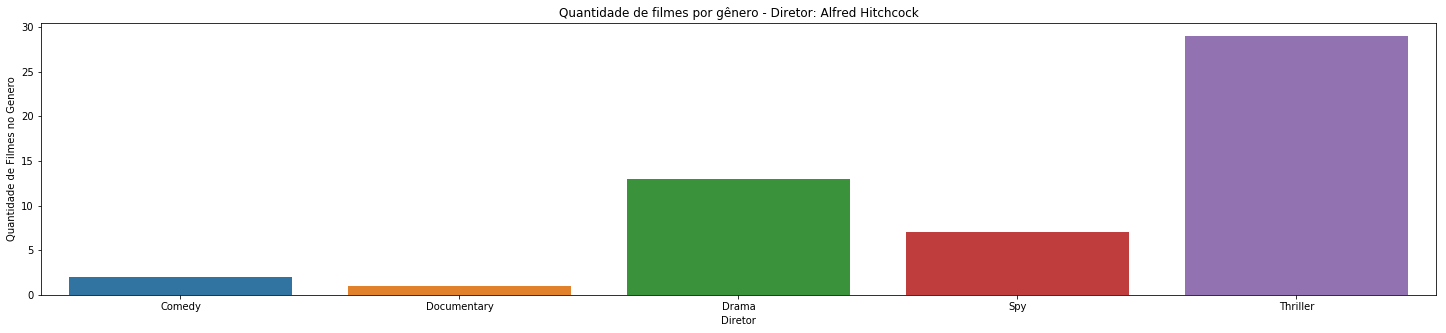

In [19]:
print('Quantidade de filmes por gênero - Diretor: ' + diretor)
for l in range(len(generosDiretor)):
    print(generosDiretor[l] + ': '  + str(qtdeGenerosDiretor[l]))

plt.figure(figsize=(25, 5))
sns.barplot(
    x=generosDiretor, 
    y=qtdeGenerosDiretor
)
plt.title('Quantidade de filmes por gênero - Diretor: ' + diretor)
plt.xlabel('Diretor')
plt.ylabel('Quantidade de Filmes no Genero')
plt.show()

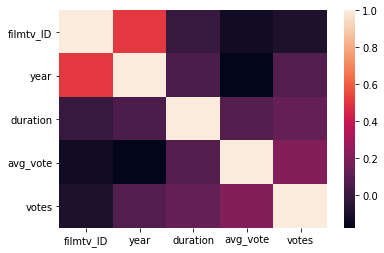

In [20]:
import seaborn as sns
%matplotlib inline
# calculate the correlation matrix
corr = df_filmes.corr()
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

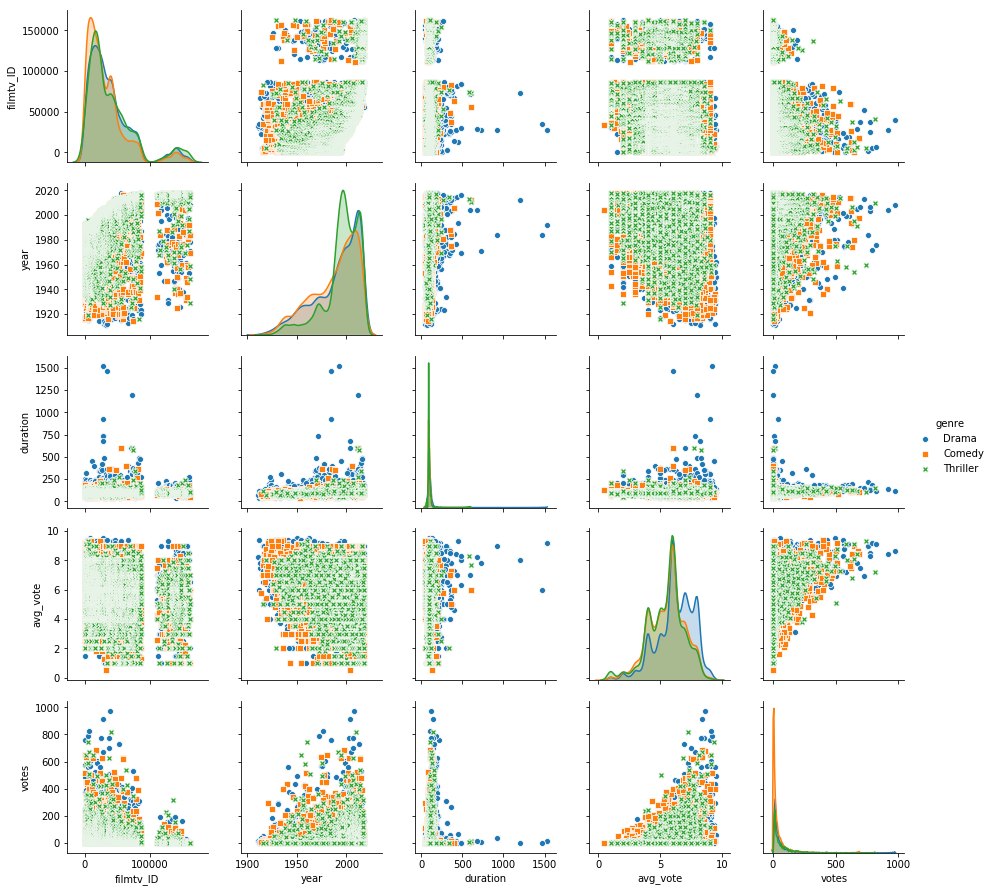

In [61]:


#df_filmes['genre'].apply(lambda x: 
                         #print(x)).head()

df_animacoes = df_filmes[((df_filmes.genre == 'Thriller') | (df_filmes.genre == 'Comedy') | (df_filmes.genre == 'Drama'))]
df_animacoes.head()
df_animacoes.groupby('genre').size().head()
sns.pairplot(df_animacoes, hue="genre", markers=["o", "s", "X"])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f53edb10cf8>,
      dtype=object)

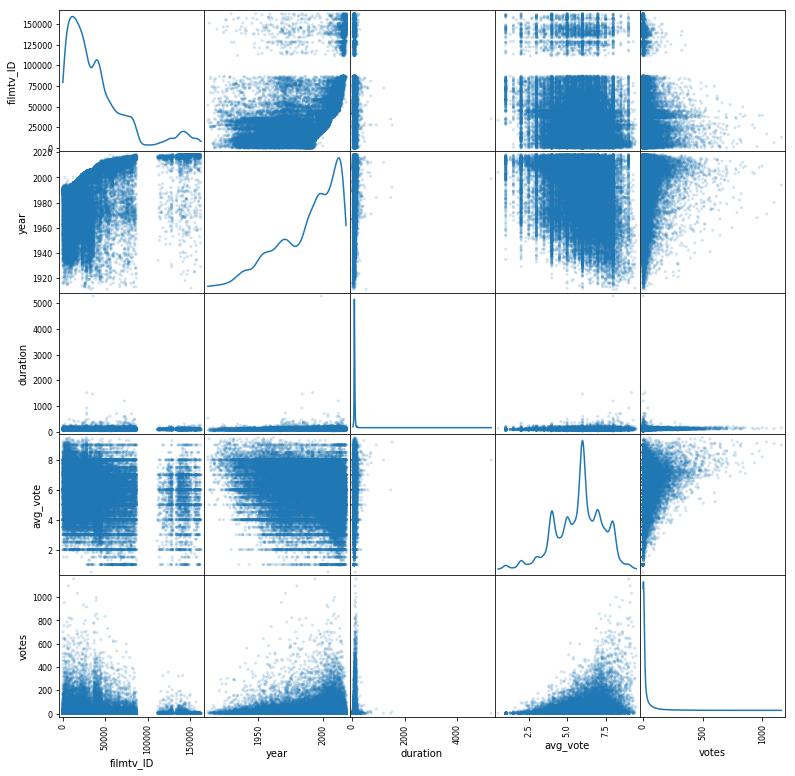

In [22]:
from pandas.plotting import scatter_matrix

scatter_matrix(df_filmes, alpha = 0.2, figsize = (13, 13), diagonal = 'kde')